### Admir Makas
### Vibration Testing Final (Home Take part b)
### 4/26/2016

In [2]:
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sm
sm.init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import Image
import scipy.linalg as la
import control as ctrl

#### Load . mat file 'mckiddat.mat'

In [3]:
data = sio.loadmat('mckiddat2.mat')

#### Show contents of the .mat file

In [4]:
sio.whosmat('mckiddat2.mat')

[('Freq', (401, 1), 'double'),
 ('IRF_11', (802, 1), 'double'),
 ('IRF_12', (802, 1), 'double'),
 ('IRF_13', (802, 1), 'double'),
 ('Recep', (401, 3), 'double'),
 ('t', (802, 1), 'double')]

#### Define data structures

In [5]:
Freq = data['Freq'];
Recep = data['Recep'];
t = data['t'];
IRF_11 = data['IRF_11'];
IRF_12 = data['IRF_12'];
IRF_13 = data['IRF_13'];

### Plot the given data:

#### Plot for $H_{11}$.

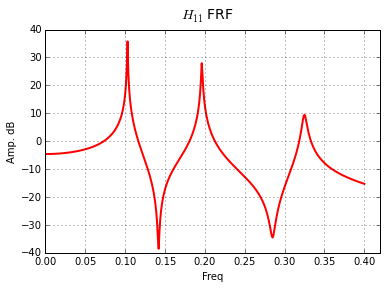

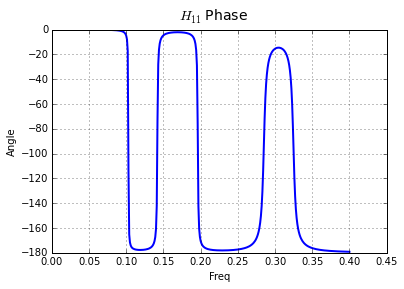

In [6]:
#Plot of H11 FRF
fig = plt.figure()
plt.plot(Freq, 20*np.log10(abs(Recep[:,0])), color='r', linewidth=2.0)
fig.suptitle('$H_{11}$ FRF', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Amp. dB')
plt.axis([0, 0.42, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
phase_11 = sp.unwrap(sp.angle(Recep[:,0]))*(180/sp.pi)
fig = plt.figure()
plt.plot(Freq, phase_11, color='b', linewidth=2.0)
fig.suptitle('$H_{11}$ Phase', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

#### Plot for $H_{12}$.

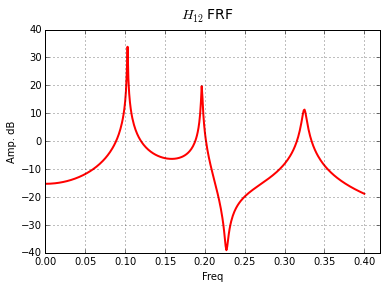

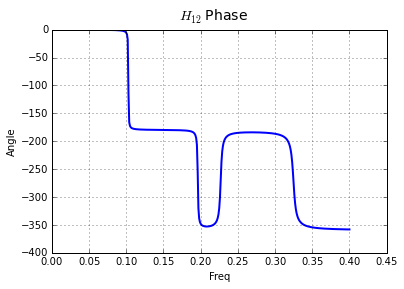

In [7]:
#Plot of H12 FRF
fig = plt.figure()
plt.plot(Freq, 20*np.log10(abs(Recep[:,1])), color='r', linewidth=2.0)
fig.suptitle('$H_{12}$ FRF', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Amp. dB')
plt.axis([0, 0.42, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
phase_12 = sp.unwrap(sp.angle(Recep[:,1]))*(180/sp.pi)
fig = plt.figure()
plt.plot(Freq, phase_12, color='b', linewidth=2.0)
fig.suptitle('$H_{12}$ Phase', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

#### Plot for $H_{13}$.

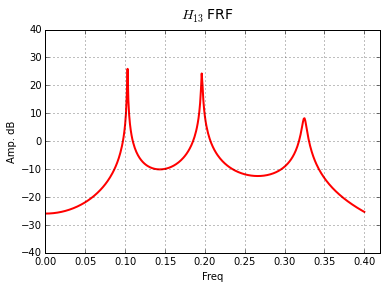

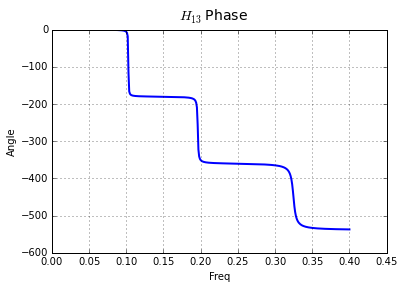

In [8]:
#Plot of H13 FRF
fig = plt.figure()
plt.plot(Freq, 20*np.log10(abs(Recep[:,2])), color='r', linewidth=2.0)
fig.suptitle('$H_{13}$ FRF', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Amp. dB')
plt.axis([0, 0.42, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
phase_13 = sp.unwrap(sp.angle(Recep[:,2]))*(180/sp.pi)
fig = plt.figure()
plt.plot(Freq, phase_13, color='b', linewidth=2.0)
fig.suptitle('$H_{13}$ Phase', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

## Plot time data obtained from the FRF's  

Time data was obtained from vibrations toolbox function 'IRF'

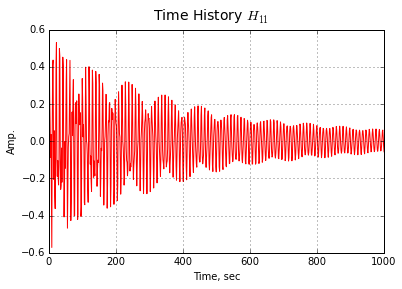

In [9]:
fig = plt.figure()
plt.plot(t, IRF_11, color='r', linewidth=1.0)
#
fig.suptitle('Time History $H_{11}$', fontsize = 14)
plt.xlabel('Time, sec')
plt.ylabel('Amp.')
plt.axis([0, 1000, -0.6, 0.6])
#
plt.grid()

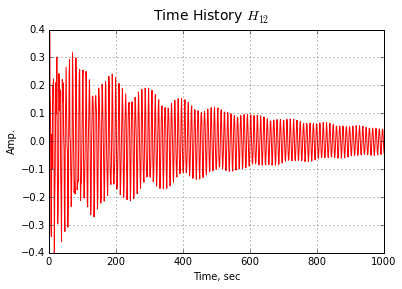

In [10]:
fig = plt.figure()
plt.plot(t, IRF_12, color='r', linewidth=1.0)
#
fig.suptitle('Time History $H_{12}$', fontsize = 14)
plt.xlabel('Time, sec')
plt.ylabel('Amp.')
plt.axis([0, 1000, -0.4, 0.4])
#
plt.grid()

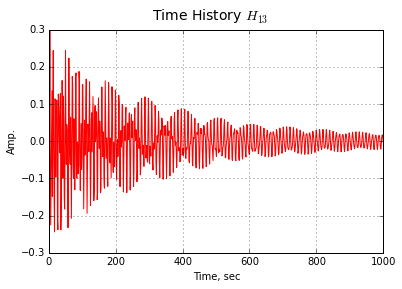

In [11]:
fig = plt.figure()
plt.plot(t, IRF_13, color='r', linewidth=1.0)
#
fig.suptitle('Time History $H_{13}$', fontsize = 14)
plt.xlabel('Time, sec')
plt.ylabel('Amp.')
plt.axis([0, 1000, -0.3, 0.3])
#
plt.grid()

**Define dt for later use:**

In [12]:
dt=t[1]
dt=dt[0]
dt

1.26262626263

## Start with defining all the Markov paramaters available:  

This will yiels a 1 by 3 matrix for each instance.

In [13]:
M=sp.array([IRF_11[:,0], IRF_12[:,0], IRF_13[:,0]]).T
display(M)

array([[  7.12525864e-02,  -8.97410927e-02,  -2.16518762e-04],
       [  5.18989926e-01,  -5.77539023e-03,  -5.08048481e-02],
       [  2.46427900e-01,   3.91599043e-01,   5.87326855e-03],
       ..., 
       [  8.57423581e-03,   1.35764096e-02,   4.55806346e-04],
       [ -2.69818797e-02,  -3.06581263e-02,  -3.86196876e-03],
       [ -7.88591807e-02,  -3.05409593e-02,  -2.28704707e-02]])

In [14]:
M.shape

(802, 3)

**Make alternate markov paramater matrix.**

In [15]:
a1=802

#get 1st column
W=sp.array([M[0], [M[0,1], 0 , 0], [M[0,2], 0, 0]])
#display(W)

for i in range(1,a1):
    k=1+i
    Ri=sp.array([M[i], [M[i,1], 0 , 0], [M[i,2], 0, 0]])
    W=sp.concatenate((W, Ri), axis=0)
    
display(W)
display(W.shape)

array([[ 0.07125259, -0.08974109, -0.00021652],
       [-0.08974109,  0.        ,  0.        ],
       [-0.00021652,  0.        ,  0.        ],
       ..., 
       [-0.07885918, -0.03054096, -0.02287047],
       [-0.03054096,  0.        ,  0.        ],
       [-0.02287047,  0.        ,  0.        ]])

(2406, 3)

In [16]:
W1=W[:3,:3]
W1

array([[ 0.07125259, -0.08974109, -0.00021652],
       [-0.08974109,  0.        ,  0.        ],
       [-0.00021652,  0.        ,  0.        ]])

**Define $H(0)$ matrix from the defined Markov paramaters:**

In [17]:
# Construct H0

#define how many rows you will have (a index)
a=602
#define how many columns you will have (b index)
b=200

#Indeces a and be above do not really give size of
#final matrix. That will be the following
row_i=a-1
column_i=b
display('rows', row_i)
display('columns', column_i)

#get 1st column
H0=W[3:3*a, :3]
#display(H0)

for i in range(1,b):
    k=1+i
    Hi=W[3*k:(a+i)*3, :3]
    H0=sp.concatenate((H0, Hi), axis=1)
    
#display(H0)

display('H0 shape ', H0.shape)

#display(i)
#display(k)
display('Last M row used ', (a+i))

index1=H0.shape[0]
index2=H0.shape[1]
display('indices')
display(index1, index2)

'rows'

601

'columns'

200

'H0 shape '

(1803, 600)

'Last M row used '

801

'indices'

1803

600

**Define $H(1)$ matrix from the defined Markov paramaters:**

In [18]:
# Construct H1

#Used same a and b from H0 definition

#Indeces a and be above do not really give size of
#final matrix. That will be the following
row_i=a-1
column_i=b
display('rows', row_i)
display('columns', column_i)

#get 1st column for H1, which will be starting at M(2)
H1=W[(2*3):(a+1)*3, :3]
#display(H1)

for j in range(1,b):
    k=2+j
    Hj=W[3*k:(a+j+1)*3, :3]
    H1=sp.concatenate((H1, Hj), axis=1)
    
#display(H1)

#H1=H1[:index, :index]
display(H1.shape)

'rows'

601

'columns'

200

(1803, 600)

**Perform SVD on the H0 matrix to get following matrices:**  

- **U, $V^T$, and $\Sigma$**

In [19]:
U, Sig, Vt = la.svd(H0)
display('raw Vt ', Vt.shape)
display('raw U ', U.shape)
V=Vt.T

if index2<index1:
    display('if statement done')
    V=V[:, :index2]
    display('V size ', V.shape)
    U=U[:, :index2]
    display('U size ', U.shape)
else:
    display('else statement')
    V=V[:, :index1]
    display(V.shape)
    U=U[:index1, :]
    display(U.shape)

'raw Vt '

(600, 600)

'raw U '

(1803, 1803)

'if statement done'

'V size '

(600, 600)

'U size '

(1803, 600)

In [20]:
#Sig

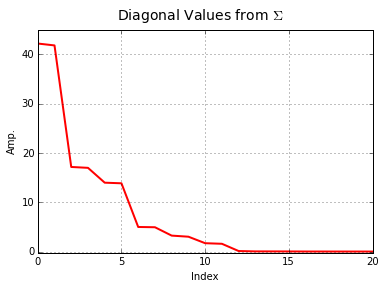

In [21]:
fig = plt.figure()
plt.plot(Sig, color='r', linewidth=2.0)
#
fig.suptitle('Diagonal Values from $\Sigma$', fontsize = 14)
plt.xlabel('Index')
plt.ylabel('Amp.')
plt.axis([0, 20, -0.25, 45])
#
plt.grid()

**Based on plot above for diagonal values $\Sigma$ there are only 6 significant values. Therefore, matrices A, B, C, D will be resized to following dimensions:**  

- A: 12 by 12
- B: 12 by 1
- C: 3 by 12
- D: 3 by 1

**Put all values of Sig on a diagonal:**

In [22]:
SigD = sp.diag(Sig)
display(SigD.shape)

(600, 600)

### Calculation of state matix A:

**Calculate discrete state matrix $A_d$:**

In [23]:
A_d = la.inv(sp.sqrt(SigD))@U.T@H1@V@la.inv(sp.sqrt(SigD))
display(A_d)
display(A_d.shape)

array([[  6.91875516e-01,   7.18693824e-01,  -1.54974619e-03, ...,
         -3.69392452e-05,  -1.61124547e-05,   2.75689820e-05],
       [ -7.21052506e-01,   6.89910984e-01,   6.08509959e-03, ...,
          3.91729978e-05,   1.70600102e-05,  -2.92052301e-05],
       [ -4.94243500e-03,  -7.69607462e-03,   3.43648927e-02, ...,
         -2.02090643e-06,  -9.20526773e-07,   1.58122517e-06],
       ..., 
       [ -5.93730985e-04,  -1.00821882e-04,  -3.35594870e-04, ...,
         -1.98442051e+00,  -1.35758033e-01,   4.20557016e-01],
       [ -4.14882775e-05,  -7.05113494e-06,  -2.31890057e-05, ...,
         -3.40505173e-01,  -7.48950060e-02,   7.97288616e-02],
       [  8.25698989e-05,   1.40558555e-05,   4.44340422e-05, ...,
          6.96331249e-01,   1.64762010e-01,  -5.63331482e-01]])

(600, 600)

**Calculate continuous state space matix A:**

In [24]:
A = la.logm(A_d)/dt
display(A.shape)

(600, 600)

**Because $\Sigma$ matrix has only 6 values that are significant the $A_d$ matrix is truncated to a 6 by 6 in order to proceed with the calculation of continuous state space matrix A.**

In [25]:
A_d=A_d[:12,:12]
#display(A_d)
display(A_d.shape)

(12, 12)

**Calculate discrete eigenvectors and eigenvalues for $A_d$.**

In [47]:
lam_d, vec = la.eig(A_d)
print(lam_d)
#print(vec)

[ 0.69090307+0.7198832j   0.69090307-0.7198832j   0.69090292+0.71988284j
  0.69090292-0.71988284j -0.81017105+0.55159465j -0.81017105-0.55159465j
 -0.81012066+0.55161655j -0.81012066-0.55161655j  0.03376853+0.99440742j
  0.03376853-0.99440742j  0.03376917+0.99440738j  0.03376917-0.99440738j]


**Continuous eigenvalues.**

In [27]:
lam = sp.log(lam_d)/dt
lam

array([-0.00175465+0.63830218j, -0.00175465-0.63830218j,
       -0.00175494+0.63830207j, -0.00175494-0.63830207j,
       -0.01590416+2.01472419j, -0.01590416-2.01472419j,
       -0.01592786+2.01468665j, -0.01592786-2.01468665j,
       -0.00398536+1.21718594j, -0.00398536-1.21718594j,
       -0.00398538+1.21718542j, -0.00398538-1.21718542j])

### Natural frequencies and damping rations listed below closely match the experimental data:

In [28]:
# These are the continuous time eigenvalues
print('The undamped natural frequency #1 is {} Hz.'.format(abs(lam[0])/(2*sp.pi)))
#print('The undamped natural frequency #2 is {} Hz.'.format(abs(lam[1])/(2*sp.pi)))
#print('The undamped natural frequency #3 is {} Hz.'.format(abs(lam[2])/(2*sp.pi)))
#print('The undamped natural frequency #4 is {} Hz.'.format(abs(lam[3])/(2*sp.pi)))
print('The undamped natural frequency #2 is {} Hz.'.format(abs(lam[4])/(2*sp.pi)))
#print('The undamped natural frequency #6 is {} Hz.'.format(abs(lam[5])/(2*sp.pi)))
#print('The undamped natural frequency #7 is {} Hz.'.format(abs(lam[6])/(2*sp.pi)))
#print('The undamped natural frequency #8 is {} Hz.'.format(abs(lam[7])/(2*sp.pi)))
print('The undamped natural frequency #3 is {} Hz.'.format(abs(lam[8])/(2*sp.pi)))
#print('The undamped natural frequency #10 is {} Hz.'.format(abs(lam[9])/(2*sp.pi)))
#print('The undamped natural frequency #11 is {} Hz.'.format(abs(lam[10])/(2*sp.pi)))
#print('The undamped natural frequency #12 is {} Hz.'.format(abs(lam[11])/(2*sp.pi)))
print()
print('The damping ratio for frequency #1 is {}.'.format(-sp.real(lam[0])/abs(lam[0])))
print('The damping ratio for frequency #2 is {}.'.format(-sp.real(lam[4])/abs(lam[4])))
print('The damping ratio for frequency #3 is {}.'.format(-sp.real(lam[8])/abs(lam[8])))

The undamped natural frequency #1 is 0.10158933124370159 Hz.
The undamped natural frequency #2 is 0.3206633050699322 Hz.
The undamped natural frequency #3 is 0.1937221968421485 Hz.

The damping ratio for frequency #1 is 0.0027489207996622125.
The damping ratio for frequency #2 is 0.007893717157732046.
The damping ratio for frequency #3 is 0.003274225824888612.


**Reshape continuous state matrix A:**

In [29]:
A = A[:12,:12]
#display(A)
display(A.shape)

(12, 12)

### Calculation of matrix B:

**Calculate discrete matrix $B_d$:**

In [30]:
B_d = sp.sqrt(SigD)@V.T[:,0].T.reshape((index2,1))
#B_d = sp.sqrt(SigD)@V.T[:,0]
#print(B_d)
display(B_d.shape)

(600, 1)

**Reshape matrix B to be a 6 by 1 matrix.**

In [31]:
B_d=B_d[:12,:]
display(B_d)
display(B_d.shape)

array([[-0.65297877],
       [-0.2201654 ],
       [-0.55382621],
       [ 0.0196902 ],
       [-0.20650344],
       [ 0.05388812],
       [-0.16177422],
       [-0.01470604],
       [-0.34929584],
       [-0.17746084],
       [ 0.18582995],
       [-0.09369898]])

(12, 1)

**Calculate continuous matrix B:**

In [32]:
B = la.solve((A_d - sp.eye(12)), A) @ B_d
print(B)
display(B.shape)

[[-0.41888597 +2.18934709e-05j]
 [-0.37251056 +8.95850549e-05j]
 [-0.33834738 -9.38194650e-05j]
 [ 0.34827090 -1.33422305e-04j]
 [-0.14562097 -3.64069233e-05j]
 [ 0.11196986 +1.40489707e-04j]
 [-0.09061805 +7.83137904e-05j]
 [-0.10915193 -1.36834690e-04j]
 [-0.29424582 -8.63116457e-04j]
 [ 0.30904384 -1.95930224e-04j]
 [ 0.15514431 -2.25043191e-04j]
 [ 0.16369502 -8.07974257e-05j]]


(12, 1)

### Calculation of matrix C:

In [33]:
C = (U @ sp.sqrt(SigD))[:3,:]
#C=sp.array([C])
#print(C)
display(C.shape)

(3, 600)

**Reshape matrix C to be a 3 by 6.**

In [34]:
C=C[:,:12]
display(C)
display(C.shape)

array([[ -4.63399609e-01,   2.92987120e-01,  -5.13951500e-01,
          2.09629533e-02,   1.59855114e-01,   7.72727686e-02,
          1.52306141e-01,  -5.07575892e-03,  -3.50790735e-01,
          1.78496597e-01,  -1.86471281e-01,  -9.42848024e-02],
       [ -2.44403032e-01,   1.59938547e-01,   1.43566976e-01,
         -2.03773685e-02,  -2.48599679e-01,  -1.51078882e-01,
          1.38441569e-01,   7.82232361e-03,   2.09123456e-01,
         -1.12901397e-01,  -2.09099793e-01,  -1.11150307e-01],
       [ -9.69868765e-02,   6.52228368e-02,   2.39963628e-01,
         -1.01045671e-02,  -1.02775919e-01,  -5.24188745e-02,
          2.39831274e-01,   1.02663078e-04,  -1.48377195e-01,
          7.65918884e-02,   1.47877239e-01,   7.89123387e-02]])

(3, 12)

### Calculation of matrix D:

In [35]:
D=M[:1,:3]
D=D.T
display(D)
display(D.shape)

array([[ 0.07125259],
       [-0.08974109],
       [-0.00021652]])

(3, 1)

In [36]:
#D=W1
#display(D)
#display(D.shape)

In [37]:
#D=sp.array([[0, 0, 0]]).T
#display(D)
#display(D.shape)

### Construct the state space system from derived matrices

In [38]:
sys = ctrl.ss(A, B, C, D)
#sys

### Plot Identified Ho-Kalman System vs. Lab Data

In [39]:
def ssfrf(sys, omega_low, omega_high, in_index, out_index):
        A, B, C, D = ctrl.ssdata(sys)
        sa = A.shape[0]
        omega = sp.linspace(omega_low, omega_high,5000)
        H = omega* 1j
        i = 0
        for i in sp.arange(len(omega)):
            w = omega[i]
            H[i] = (C@la.solve(w*1j*sp.eye(sa)-A,B)+D)[out_index,in_index]
        return omega, H

**System plot for $H_{11}$ estimate:**

In [40]:
w, Hx1 = ssfrf(sys, 0, 3.0, 0, 0)

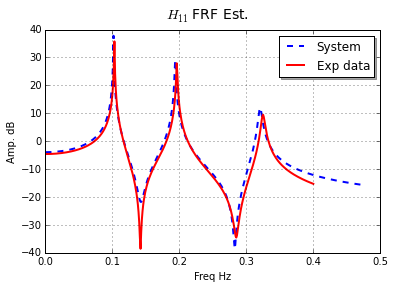

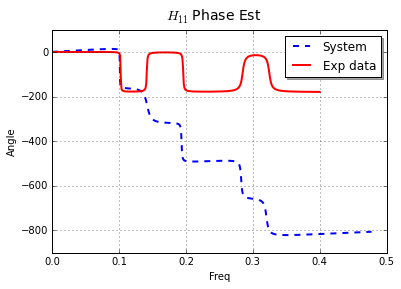

In [41]:
#Plot of H11 FRF
fig = plt.figure()
plt.plot(w/(2*sp.pi), 20*np.log10(abs(Hx1)),'b--', linewidth=2.0, label='System')
plt.plot(Freq, 20*np.log10(abs(Recep[:,0])),'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{11}$ FRF Est.', fontsize = 14)
plt.xlabel('Freq Hz')
plt.ylabel('Amp. dB')
plt.axis([0, .5, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
sysP_11 = sp.unwrap(sp.angle(Hx1))*(180/sp.pi)
fig = plt.figure()
plt.plot(w/(2*sp.pi), sysP_11, 'b--', linewidth=2.0, label='System')
plt.plot(Freq, phase_11, 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{11}$ Phase Est', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

**System plot for $H_{12}$ estimate:**

In [42]:
w, Hx2 = ssfrf(sys, 0, 3, 0, 1)

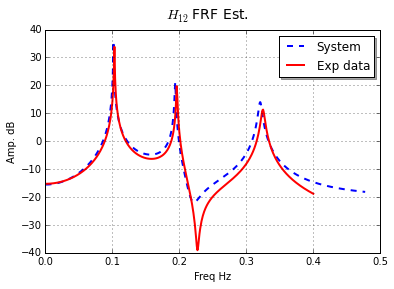

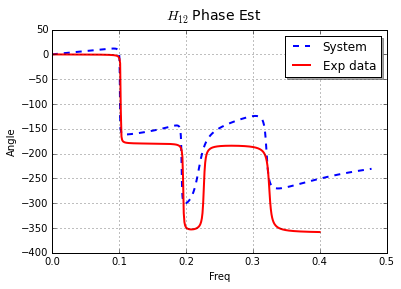

In [43]:
#Plot of H12 FRF
fig = plt.figure()
plt.plot(w/(2*sp.pi), 20*np.log10(abs(Hx2)),'b--', linewidth=2.0, label='System')
plt.plot(Freq, 20*np.log10(abs(Recep[:,1])), 'r', linewidth=2.0,  label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{12}$ FRF Est.', fontsize = 14)
plt.xlabel('Freq Hz')
plt.ylabel('Amp. dB')
plt.axis([0, .5, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
sysP_12 = sp.unwrap(sp.angle(Hx2))*(180/sp.pi)
fig = plt.figure()
plt.plot(w/(2*sp.pi), sysP_12, 'b--', linewidth=2.0, label='System')
plt.plot(Freq, phase_12, 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{12}$ Phase Est', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

**System plot for $H_{13}$ estimate:**

In [44]:
w, Hx3 = ssfrf(sys, 0, 3, 0, 2)

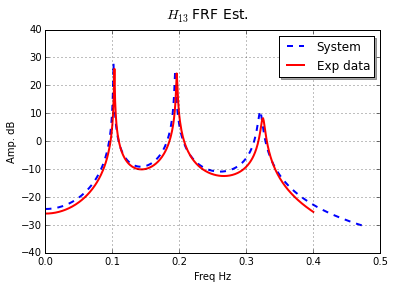

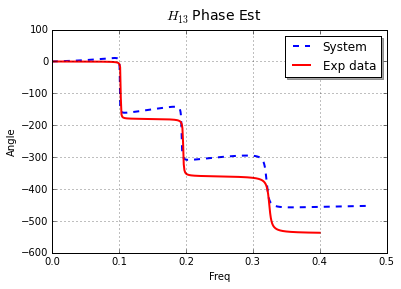

In [45]:
#Plot of H13 FRF
fig = plt.figure()
plt.plot(w/(2*sp.pi), 20*np.log10(abs(Hx3)), 'b--', linewidth=2.0, label='System')
plt.plot(Freq, 20*np.log10(abs(Recep[:,2])), 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{13}$ FRF Est.', fontsize = 14)
plt.xlabel('Freq Hz')
plt.ylabel('Amp. dB')
plt.axis([0, .5, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
sysP_13 = sp.unwrap(sp.angle(Hx3))*(180/sp.pi)
fig = plt.figure()
plt.plot(w/(2*sp.pi), sysP_13, 'b--', linewidth=2.0, label='System')
plt.plot(Freq, phase_13, 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{13}$ Phase Est', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

In [46]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')